In [2]:
import numpy as np
import pandas as pd
import random

import glob
import os
import re
import pickle
import math
import scipy
from scipy.stats import percentileofscore
from scipy import stats

# import visualize library
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (7, 4)

#import ase.io
import pymatgen
import matminer
from mpl_toolkits.mplot3d import Axes3D
from pymatgen.core.structure import Structure
from pymatgen.core.composition import Element, Composition
from pymatgen.core.periodic_table import Specie
from pymatgen.analysis.ewald import EwaldSummation
from pymatgen.io.vasp.inputs import Poscar
from pymatgen.io.cif import CifWriter
from pymatgen.io.cif import CifParser
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


import data_utils
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.structure import CoulombMatrix

# import atomic table
import mendeleev
from mendeleev import*
from mendeleev import element

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 2000)

cwd = os.getcwd()
path = cwd 

from chemformula import ChemFormula
from chemlib import Element
from pprint import pprint



# 1. Raw data

In [ ]:
from collections import Counter, OrderedDict

def structure_cif(cif):
    structure = CifParser.from_string(cif).get_structures()[0]
    return structure
def structure(path_vasp):
    structure = Structure.from_file(path_vasp)
    
    return structure

def A_k(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[0]
def B_l(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[1]

def C_m(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[2]

def D_n(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[3]

def E_p(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[4]

def ABCDE_Basic(chem_formula = "H1Pb1I3"):
    
    x = ChemFormula(chem_formula)
    elements = []
    num_elements = []

    for k, v in x.element.items():
        elements.append(k)
        num_elements.append(v)
    
    A = elements[0]
    B = elements[1]
    C = elements[2]
    D = elements[3]
    E = elements[4]
    
        
    df_basic_A = pd.DataFrame(Element(A).properties, index = ["value"])
    df_basic_B = pd.DataFrame(Element(B).properties, index = ["value"])
    df_basic_C = pd.DataFrame(Element(C).properties, index = ["value"])
    df_basic_D = pd.DataFrame(Element(D).properties, index = ["value"])
    df_basic_E = pd.DataFrame(Element(E).properties, index = ["value"])
      
        
    df_basic_A.drop(["Element","Discoverer","Year","Isotopes","Config", "Radioactive","Natural","Metal","Nonmetal"], axis=1, inplace=True)
    df_basic_A = df_basic_A.rename(columns=lambda x: 'A_' + x)
    
    df_basic_B.drop(["Element","Discoverer","Year","Isotopes","Config", "Radioactive","Natural","Metal","Nonmetal"], axis=1, inplace=True)
    df_basic_B = df_basic_B.rename(columns=lambda x: 'B_' + x) 
    
    df_basic_C.drop(["Element","Discoverer","Year","Isotopes","Config", "Radioactive","Natural","Metal","Nonmetal"], axis=1, inplace=True)
    df_basic_C = df_basic_C.rename(columns=lambda x: 'C_' + x)

    df_basic_D.drop(["Element","Discoverer","Year","Isotopes","Config", "Radioactive","Natural","Metal","Nonmetal"], axis=1, inplace=True)
    df_basic_D = df_basic_D.rename(columns=lambda x: 'D_' + x) 
    
    df_basic_E.drop(["Element","Discoverer","Year","Isotopes","Config", "Radioactive","Natural","Metal","Nonmetal"], axis=1, inplace=True)
    df_basic_E = df_basic_E.rename(columns=lambda x: 'E_' + x)
    
    
    df = pd.concat([df_basic_A, df_basic_B, df_basic_C, df_basic_D, df_basic_E], axis = 1)
    #df = pd.concat([df_basic_A, df_basic_B, df_basic_C], axis = 1)
    
    
    return  df

from collections import Counter, OrderedDict

def A_k(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[0]
def B_l(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[1]

def C_m(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[2]

def D_n(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[3]

def E_p(structure):
    """
    นับจำนวนสมาชิก unique ใน list โดยเรียงตามลำดับที่ปรากฏใน list เดิม

    Args:
        lst: list ที่ต้องการนับ

    Returns:
        list ของจำนวนสมาชิก unique ที่เรียงตามลำดับเดิม
    """
    counts = Counter(structure.species)
    ordered_counts = OrderedDict.fromkeys(structure.species, 0)
    for key, value in counts.items():
        ordered_counts[key] = value
    return list(ordered_counts.values())[4]


In [ ]:
df = pd.read_csv("df_ABCDE.csv", index_col = [0])
df.reset_index(inplace = True, drop = True) 
df0 = df.copy()
df1 = df0.copy()
df1["structure"] = df0["cif"].apply(structure_cif)
df_ABCDE = df1.copy() 

In [13]:
%%time
df_ABCDE["A_k"] = None
df_ABCDE["B_l"] = None
df_ABCDE["C_m"] = None
df_ABCDE["D_n"] = None
df_ABCDE["E_p"] = None

df_ABCDE["A_k"] = df_ABCDE["structure"].apply(A_k)
df_ABCDE["B_l"] = df_ABCDE["structure"].apply(B_l)
df_ABCDE["C_m"] = df_ABCDE["structure"].apply(C_m)
df_ABCDE["D_n"] = df_ABCDE["structure"].apply(D_n)
df_ABCDE["E_p"] = df_ABCDE["structure"].apply(E_p)

df_ABCDE   

CPU times: user 472 ms, sys: 4.5 ms, total: 476 ms
Wall time: 474 ms


,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4
2,mp-672333,"{'Pb': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Pb4C4S4N4Cl4,PbCSNCl,-114.400020,-5.720001,-0.596267,3.3489,"[[1.0812 9.03720308 8.31071929] Pb, [3.243...",# generated using pymatgen\ndata_PbCSNCl\n_sym...,4,4,4,4,4
3,mp-556856,"{'Ba': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Ba2C2S2N2Cl2,BaCSNCl,-62.016389,-6.201639,-1.436628,4.1350,"[[-3.51734625 -4.61685188 5.51353869] Ba, [-1...",# generated using pymatgen\ndata_BaCSNCl\n_sym...,2,2,2,2,2
4,mp-1030700,"{'Te': 2.0, 'Mo': 1.0, 'W': 1.0, 'Se': 1.0, 'S...",Te4Mo2W2Se2S2,Te2MoWSeS,-80.253137,-6.687761,-0.511217,0.9864,"[[ 0. 0. -25.99906318] Te, ...",# generated using pymatgen\ndata_Te2MoWSeS\n_s...,4,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,mp-758453,"{'Na': 2.0, 'P': 2.0, 'H': 4.0, 'N': 2.0, 'O':...",Na8P8H16N8O20,Na2P2H4N2O5,-359.418365,-5.990306,-1.754090,4.6627,"[[-2.0244532 1.23245122 0.13487151] Na, [-4...",# generated using pymatgen\ndata_Na2P2H4N2O5\n...,8,8,16,8,20
1255,mp-1211951,"{'K': 3.0, 'Mo': 3.0, 'C': 3.0, 'Se': 4.0, 'N'...",K6Mo6C6Se8N4,K3Mo3C3(Se2N)2,-202.617935,-6.753931,-0.524798,0.0998,"[[-5.52616225 5.79443328 4.65553312] K, [-3....",# generated using pymatgen\ndata_K3Mo3C3(Se2N)...,6,6,6,8,4
1256,mp-1218497,"{'Sr': 4.0, 'Mn': 2.0, 'Cu': 3.0, 'Se': 4.0, '...",Sr4Mn2Cu3Se4O4,Sr4Mn2Cu3(SeO)4,-94.782142,-5.575420,-1.752857,0.0000,"[[3.10510086 0.52867734 4.35689548] Sr, [3.994...",# generated using pymatgen\ndata_Sr4Mn2Cu3(SeO...,4,2,3,4,4
1257,mp-555856,"{'Sr': 4.0, 'Mn': 2.0, 'Cu': 3.0, 'S': 4.0, 'O...",Sr8Mn4Cu6S8O8,Sr4Mn2Cu3(SO)4,-195.855579,-5.760458,-1.941158,0.0000,"[[-8.15651383 -7.37054868 4.85188898] Sr, [ 1...",# generated using pymatgen\ndata_Sr4Mn2Cu3(SO)...,8,4,6,8,8


In [15]:
%%time
df_list = []
for i in range(df_ABCDE.shape[0]):
    df_basic = ABCDE_Basic(chem_formula = str(df_ABCDE["full_formula"][i]))
    df_list.append(df_basic)

df_chem = pd.concat(df_list, ignore_index=True)

CPU times: user 5.6 s, sys: 44.8 ms, total: 5.65 s
Wall time: 5.65 s


In [16]:
df_chem

,A_AtomicNumber,A_Symbol,A_AtomicMass,A_Neutrons,A_Protons,A_Electrons,A_Period,A_Group,A_Phase,A_Metalloid,A_Type,A_AtomicRadius,A_Electronegativity,A_FirstIonization,A_Density,A_MeltingPoint,A_BoilingPoint,A_SpecificHeat,A_Shells,A_Valence,A_MassNumber,B_AtomicNumber,B_Symbol,B_AtomicMass,B_Neutrons,B_Protons,B_Electrons,B_Period,B_Group,B_Phase,B_Metalloid,B_Type,B_AtomicRadius,B_Electronegativity,B_FirstIonization,B_Density,B_MeltingPoint,B_BoilingPoint,B_SpecificHeat,B_Shells,B_Valence,B_MassNumber,C_AtomicNumber,C_Symbol,C_AtomicMass,C_Neutrons,C_Protons,C_Electrons,C_Period,C_Group,C_Phase,C_Metalloid,C_Type,C_AtomicRadius,C_Electronegativity,C_FirstIonization,C_Density,C_MeltingPoint,C_BoilingPoint,C_SpecificHeat,C_Shells,C_Valence,C_MassNumber,D_AtomicNumber,D_Symbol,D_AtomicMass,D_Neutrons,D_Protons,D_Electrons,D_Period,D_Group,D_Phase,D_Metalloid,D_Type,D_AtomicRadius,D_Electronegativity,D_FirstIonization,D_Density,D_MeltingPoint,D_BoilingPoint,D_SpecificHeat,D_Shells,D_Valence,D_MassNumber,E_AtomicNumber,E_Symbol,E_AtomicMass,E_Neutrons,E_Protons,E_Electrons,E_Period,E_Group,E_Phase,E_Metalloid,E_Type,E_AtomicRadius,E_Electronegativity,E_FirstIonization,E_Density,E_MeltingPoint,E_BoilingPoint,E_SpecificHeat,E_Shells,E_Valence,E_MassNumber
0,80,Hg,200.590,121,80,80,6,12,liq,False,Transition Metal,1.8,2.00,10.4375,13.500,234.43,630.0,0.140,6,0,201,6,C,12.011,6,6,6,2,14,solid,False,Nonmetal,0.91,2.55,11.2603,2.27,3948.15,4300.0,0.709,2,4,12,16,S,32.065,16,16,16,3,16,solid,False,Nonmetal,1.10,2.58,10.3600,2.07000,388.510,717.80,0.710,3,6,32,7,N,14.007,7,7,7,2,15,gas,False,Nonmetal,0.75,3.04,14.5341,0.00125,63.29,77.36,1.040,2,5,14,17,Cl,35.453,18,17,17,3,17,gas,False,Halogen,0.97,3.16,12.9676,0.00321,172.31,239.11,0.479,3,7,35
1,50,Sn,118.710,69,50,50,5,14,solid,False,Metal,1.7,1.96,7.3439,7.290,505.21,2875.0,0.228,5,4,119,6,C,12.011,6,6,6,2,14,solid,False,Nonmetal,0.91,2.55,11.2603,2.27,3948.15,4300.0,0.709,2,4,12,16,S,32.065,16,16,16,3,16,solid,False,Nonmetal,1.10,2.58,10.3600,2.07000,388.510,717.80,0.710,3,6,32,7,N,14.007,7,7,7,2,15,gas,False,Nonmetal,0.75,3.04,14.5341,0.00125,63.29,77.36,1.040,2,5,14,9,F,18.998,10,9,9,2,17,gas,False,Halogen,0.57,3.98,17.4228,0.00170,53.63,85.03,0.824,2,7,19
2,82,Pb,207.200,125,82,82,6,14,solid,False,Metal,1.8,2.33,7.4167,11.300,600.75,2022.0,0.129,6,4,207,6,C,12.011,6,6,6,2,14,solid,False,Nonmetal,0.91,2.55,11.2603,2.27,3948.15,4300.0,0.709,2,4,12,16,S,32.065,16,16,16,3,16,solid,False,Nonmetal,1.10,2.58,10.3600,2.07000,388.510,717.80,0.710,3,6,32,7,N,14.007,7,7,7,2,15,gas,False,Nonmetal,0.75,3.04,14.5341,0.00125,63.29,77.36,1.040,2,5,14,17,Cl,35.453,18,17,17,3,17,gas,False,Halogen,0.97,3.16,12.9676,0.00321,172.31,239.11,0.479,3,7,35
3,56,Ba,137.327,81,56,56,6,2,solid,False,Alkaline Earth Metal,2.8,0.89,5.2117,3.590,1002.15,2170.0,0.204,6,2,137,6,C,12.011,6,6,6,2,14,solid,False,Nonmetal,0.91,2.55,11.2603,2.27,3948.15,4300.0,0.709,2,4,12,16,S,32.065,16,16,16,3,16,solid,False,Nonmetal,1.10,2.58,10.3600,2.07000,388.510,717.80,0.710,3,6,32,7,N,14.007,7,7,7,2,15,gas,False,Nonmetal,0.75,3.04,14.5341,0.00125,63.29,77.36,1.040,2,5,14,17,Cl,35.453,18,17,17,3,17,gas,False,Halogen,0.97,3.16,12.9676,0.00321,172.31,239.11,0.479,3,7,35
4,52,Te,127.600,76,52,52,5,16,solid,True,Metalloid,1.4,2.10,9.0096,6.230,722.80,1261.0,0.202,5,6,128,42,Mo,95.960,54,42,42,5,6,solid,False,Transition Metal,2.00,2.16,7.0924,10.20,2890.15,4912.0,0.251,5,0,96,74,W,183.840,110,74,74,6,6,solid,False,Transition Metal,2.00,2.36,7.8640,19.30000,3680.150,5828.00,0.132,6,0,184,34,Se,78.960,45,34,34,4,16,solid,False,Nonmetal,1.20,2.55,9.7524,4.81000,494.15,958.00,0.321,4,6,79,16,S,32.065,16,16,16,3,16,solid,False,Nonmetal,1.10,2.58,10.3600,2.07000,388.51,717.80,0.710,3,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [17]:
# จัดเรียงคอลัมน์อัตโนมัติ
prefixes = sorted(set(col.split('_')[0] for col in df_chem.columns))  # ดึง prefix เช่น A, B
suffixes = sorted(set(col.split('_')[1] for col in df_chem.columns))  # ดึง suffix เช่น man, height

# สร้างลำดับคอลัมน์ใหม่
new_column_order = [
    f"{prefix}_{suffix}" for suffix in suffixes for prefix in prefixes if f"{prefix}_{suffix}" in df_chem.columns
]

# จัดเรียงคอลัมน์
df_reordered = df_chem[new_column_order]
df_reordered

,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence
0,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7
1,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
2,207.200,12.011,32.065,14.007,35.453,82,6,16,7,17,1.8,0.91,1.10,0.75,0.97,2022.0,4300.0,717.80,77.36,239.11,11.300,2.27,2.07000,0.00125,0.00321,2.33,2.55,2.58,3.04,3.16,82,6,16,7,17,7.4167,11.2603,10.3600,14.5341,12.9676,14,14,16,15,17,207,12,32,14,35,600.75,3948.15,388.510,63.29,172.31,False,False,False,False,False,125,6,16,7,18,6,2,3,2,3,solid,solid,solid,gas,gas,82,6,16,7,17,6,2,3,2,3,0.129,0.709,0.710,1.040,0.479,Pb,C,S,N,Cl,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
3,137.327,12.011,32.065,14.007,35.453,56,6,16,7,17,2.8,0.91,1.10,0.75,0.97,2170.0,4300.0,717.80,77.36,239.11,3.590,2.27,2.07000,0.00125,0.00321,0.89,2.55,2.58,3.04,3.16,56,6,16,7,17,5.2117,11.2603,10.3600,14.5341,12.9676,2,14,16,15,17,137,12,32,14,35,1002.15,3948.15,388.510,63.29,172.31,False,False,False,False,False,81,6,16,7,18,6,2,3,2,3,solid,solid,solid,gas,gas,56,6,16,7,17,6,2,3,2,3,0.204,0.709,0.710,1.040,0.479,Ba,C,S,N,Cl,Alkaline Earth Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,2,4,6,5,7
4,127.600,95.960,183.840,78.960,32.065,52,42,74,34,16,1.4,2.00,2.00,1.20,1.10,1261.0,4912.0,5828.00,958.00,717.80,6.230,10.20,19.30000,4.81000,2.07000,2.10,2.16,2.36,2.55,2.58,52,42,74,34,16,9.0096,7.0924,7.8640,9.7524,10.3600,16,6,6,16,16,128,96,184,79,32,722.80,2890.15,3680.150,494.15,388.51,True,False,False,False,False,76,54,110,45,16,5,5,6,4,3,solid,solid,solid,solid,solid,52,42,74,34,16,5,5,6,4,3,0.202,0.251,0.132,0.321,0.710,Te,Mo,W,Se,S,Metalloid,Transition Metal,Transition Metal,Nonmetal,Nonmetal,6,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [18]:
df_2 = pd.concat([df_ABCDE,df_reordered], axis = 1)
df_2

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
2,mp-672333,"{'Pb': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Pb4C4S4N4Cl4,PbCSNCl,-114.400020,-5.720001,-0.596267,3.3489,"[[1.0812 9.03720308 8.31071929] Pb, [3.243...",# generated using pymatgen\ndata_PbCSNCl\n_sym...,4,4,4,4,4,207.200,12.011,32.065,14.007,35.453,82,6,16,7,17,1.8,0.91,1.10,0.75,0.97,2022.0,4300.0,717.80,77.36,239.11,11.300,2.27,2.07000,0.00125,0.00321,2.33,2.55,2.58,3.04,3.16,82,6,16,7,17,7.4167,11.2603,10.3600,14.5341,12.9676,14,14,16,15,17,207,12,32,14,35,600.75,3948.15,388.510,63.29,172.31,False,False,False,False,False,125,6,16,7,18,6,2,3,2,3,solid,solid,solid,gas,gas,82,6,16,7,17,6,2,3,2,3,0.129,0.709,0.710,1.040,0.479,Pb,C,S,N,Cl,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
3,mp-556856,"{'Ba': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Ba2C2S2N2Cl2,BaCSNCl,-62.016389,-6.201639,-1.436628,4.1350,"[[-3.51734625 -4.61685188 5.51353869] Ba, [-1...",# generated using pymatgen\ndata_BaCSNCl\n_sym...,2,2,2,2,2,137.327,12.011,32.065,14.007,35.453,56,6,16,7,17,2.8,0.91,1.10,0.75,0.97,2170.0,4300.0,717.80,77.36,239.11,3.590,2.27,2.07000,0.00125,0.00321,0.89,2.55,2.58,3.04,3.16,56,6,16,7,17,5.2117,11.2603,10.3600,14.534

In [20]:
df_ABCDE1 = df_2.copy()
df_ABCDE1

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
2,mp-672333,"{'Pb': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Pb4C4S4N4Cl4,PbCSNCl,-114.400020,-5.720001,-0.596267,3.3489,"[[1.0812 9.03720308 8.31071929] Pb, [3.243...",# generated using pymatgen\ndata_PbCSNCl\n_sym...,4,4,4,4,4,207.200,12.011,32.065,14.007,35.453,82,6,16,7,17,1.8,0.91,1.10,0.75,0.97,2022.0,4300.0,717.80,77.36,239.11,11.300,2.27,2.07000,0.00125,0.00321,2.33,2.55,2.58,3.04,3.16,82,6,16,7,17,7.4167,11.2603,10.3600,14.5341,12.9676,14,14,16,15,17,207,12,32,14,35,600.75,3948.15,388.510,63.29,172.31,False,False,False,False,False,125,6,16,7,18,6,2,3,2,3,solid,solid,solid,gas,gas,82,6,16,7,17,6,2,3,2,3,0.129,0.709,0.710,1.040,0.479,Pb,C,S,N,Cl,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
3,mp-556856,"{'Ba': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Ba2C2S2N2Cl2,BaCSNCl,-62.016389,-6.201639,-1.436628,4.1350,"[[-3.51734625 -4.61685188 5.51353869] Ba, [-1...",# generated using pymatgen\ndata_BaCSNCl\n_sym...,2,2,2,2,2,137.327,12.011,32.065,14.007,35.453,56,6,16,7,17,2.8,0.91,1.10,0.75,0.97,2170.0,4300.0,717.80,77.36,239.11,3.590,2.27,2.07000,0.00125,0.00321,0.89,2.55,2.58,3.04,3.16,56,6,16,7,17,5.2117,11.2603,10.3600,14.534

In [21]:
#find NaN to remove
df_ABCDE1.dropna(axis=0, inplace=True)
df_ABCDE1.reset_index(inplace = True, drop = True)
df_ABCDE1

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
2,mp-672333,"{'Pb': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Pb4C4S4N4Cl4,PbCSNCl,-114.400020,-5.720001,-0.596267,3.3489,"[[1.0812 9.03720308 8.31071929] Pb, [3.243...",# generated using pymatgen\ndata_PbCSNCl\n_sym...,4,4,4,4,4,207.200,12.011,32.065,14.007,35.453,82,6,16,7,17,1.8,0.91,1.10,0.75,0.97,2022.0,4300.0,717.80,77.36,239.11,11.300,2.27,2.07000,0.00125,0.00321,2.33,2.55,2.58,3.04,3.16,82,6,16,7,17,7.4167,11.2603,10.3600,14.5341,12.9676,14,14,16,15,17,207,12,32,14,35,600.75,3948.15,388.510,63.29,172.31,False,False,False,False,False,125,6,16,7,18,6,2,3,2,3,solid,solid,solid,gas,gas,82,6,16,7,17,6,2,3,2,3,0.129,0.709,0.710,1.040,0.479,Pb,C,S,N,Cl,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7
3,mp-556856,"{'Ba': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Ba2C2S2N2Cl2,BaCSNCl,-62.016389,-6.201639,-1.436628,4.1350,"[[-3.51734625 -4.61685188 5.51353869] Ba, [-1...",# generated using pymatgen\ndata_BaCSNCl\n_sym...,2,2,2,2,2,137.327,12.011,32.065,14.007,35.453,56,6,16,7,17,2.8,0.91,1.10,0.75,0.97,2170.0,4300.0,717.80,77.36,239.11,3.590,2.27,2.07000,0.00125,0.00321,0.89,2.55,2.58,3.04,3.16,56,6,16,7,17,5.2117,11.2603,10.3600,14.534

In [22]:
#df_ABCDE1.to_csv("df_ABCDE_basic.csv")

In [23]:
df_ABCDE1["Weighted_AtomicMass"] = None
df_ABCDE1["Weighted_AtomicNumber"] = None
df_ABCDE1["Weighted_AtomicRadius"] = None
df_ABCDE1["Weighted_BoilingPoint"] = None
df_ABCDE1["Weighted_Density"] = None
df_ABCDE1["Weighted_Electronegativity"] = None
df_ABCDE1["Weighted_FirstIonization"] = None
df_ABCDE1["Weighted_MassNumber"] = None
df_ABCDE1["Weighted_MeltingPoint"] = None
df_ABCDE1["Weighted_SpecificHeat"] = None

###
df_ABCDE1["Weighted_AtomicMass"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_AtomicMass'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_AtomicMass'] + df_ABCDE1['C_m'] * df_ABCDE1['C_AtomicMass'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_AtomicMass'] + df_ABCDE1['E_p'] * df_ABCDE1['E_AtomicMass'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_AtomicNumber"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_AtomicNumber'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_AtomicNumber'] + df_ABCDE1['C_m'] * df_ABCDE1['C_AtomicNumber'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_AtomicNumber'] + df_ABCDE1['E_p'] * df_ABCDE1['E_AtomicNumber'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_AtomicRadius"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_AtomicRadius'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_AtomicRadius'] + df_ABCDE1['C_m'] * df_ABCDE1['C_AtomicRadius'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_AtomicRadius'] + df_ABCDE1['E_p'] * df_ABCDE1['E_AtomicRadius'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_BoilingPoint"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_BoilingPoint'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_BoilingPoint'] + df_ABCDE1['C_m'] * df_ABCDE1['C_BoilingPoint'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_BoilingPoint'] + df_ABCDE1['E_p'] * df_ABCDE1['E_BoilingPoint'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_Density"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_Density'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_Density'] + df_ABCDE1['C_m'] * df_ABCDE1['C_Density'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_Density'] + df_ABCDE1['E_p'] * df_ABCDE1['E_Density'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_Electronegativity"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_Electronegativity'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_Electronegativity'] + df_ABCDE1['C_m'] * df_ABCDE1['C_Electronegativity'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_Electronegativity'] + df_ABCDE1['E_p'] * df_ABCDE1['E_Electronegativity'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_FirstIonization"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_FirstIonization'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_FirstIonization'] + df_ABCDE1['C_m'] * df_ABCDE1['C_FirstIonization'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_FirstIonization'] + df_ABCDE1['E_p'] * df_ABCDE1['E_FirstIonization'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_MassNumber"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_MassNumber'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_MassNumber'] + df_ABCDE1['C_m'] * df_ABCDE1['C_MassNumber'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_MassNumber'] + df_ABCDE1['E_p'] * df_ABCDE1['E_MassNumber'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_MeltingPoint"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_MeltingPoint'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_MeltingPoint'] + df_ABCDE1['C_m'] * df_ABCDE1['C_MeltingPoint'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_MeltingPoint'] + df_ABCDE1['E_p'] * df_ABCDE1['E_MeltingPoint'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])

df_ABCDE1["Weighted_SpecificHeat"] = (df_ABCDE1['A_k'] * df_ABCDE1['A_SpecificHeat'] +
        df_ABCDE1['B_l'] * df_ABCDE1['B_SpecificHeat'] + df_ABCDE1['C_m'] * df_ABCDE1['C_SpecificHeat'] +
        df_ABCDE1['D_n'] * df_ABCDE1['D_SpecificHeat'] + df_ABCDE1['E_p'] * df_ABCDE1['E_SpecificHeat'] ) / (df_ABCDE1['A_k'] + df_ABCDE1['B_l'] + df_ABCDE1['C_m'] + df_ABCDE1['D_n'] + df_ABCDE1['E_p'])


,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7,39.158200,17.600000,1.006000,1611.038000,2.326590,2.822000,12.184220,39.200000,991.758000,0.702200
2,mp-672333,"{'Pb': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Pb4C4S4N4Cl4,PbCSNCl,-114.400020,-5.720001,-0.596267,3.3489,"[[1.0812 9.03720308 8.31071929] Pb, [3.243...",# generated using pymatgen\ndata_PbCSNCl\n_sym...,4,4,4,4,4,207.200,12.011,32.065,14.007,35.453,82,6,16,7,17,1.8,0.91,1.10,0.75,0.97,2022.0,4300.0,717.80,77.36,239.11,11.300,2.27,2.07000,0.00125,0.00321,2.33,2.55,2.58,3.04,3.16,82,6,16,7,17,7.4167,11.2603,10.3600,14.5341,12.9676,14,14,16,15,17,207,12,32,14,35,600.75,3948.15,388.510,63.29,172.31,False,False,False,False,False,125,6,16,7,18,6,2,3,2,3,solid,solid,solid,gas,gas,82,6,16,7,17,6,2,3,2,3,0.129,0.709,0.710,1.040,0.479,Pb,C,S,N,Cl,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7,60.147200,25.600000,1.1060

In [24]:
df_ABCDE1["AddA_kB_lC_mD_nE_p"]     = None
df_ABCDE1["SubA_kB_lC_mD_nE_p_square"] = None
df_ABCDE1["AddA_kB_lC_mD_nE_p"] = df_ABCDE1["A_k"]+df_ABCDE1["B_l"]+df_ABCDE1["C_m"]+df_ABCDE1["D_n"]+df_ABCDE1["E_p"]
df_ABCDE1["SubA_kB_lC_mD_nE_p_square"] = (df_ABCDE1["A_k"]-df_ABCDE1["B_l"]-df_ABCDE1["C_m"]-df_ABCDE1["D_n"]-df_ABCDE1["E_p"])**2

df_ABCDE1["DivA_kB_l"] = None
df_ABCDE1["DivA_kC_m"] = None
df_ABCDE1["DivA_kD_n"] = None
df_ABCDE1["DivA_kE_p"] = None
df_ABCDE1["DivA_kB_l"] = df_ABCDE1["A_k"]/df_ABCDE1["B_l"]
df_ABCDE1["DivA_kC_m"] = df_ABCDE1["A_k"]/df_ABCDE1["C_m"]
df_ABCDE1["DivA_kD_n"] = df_ABCDE1["A_k"]/df_ABCDE1["D_n"]
df_ABCDE1["DivA_kE_p"] = df_ABCDE1["A_k"]/df_ABCDE1["E_p"]

df_ABCDE1["DivB_lC_m"] = None
df_ABCDE1["DivB_lD_n"] = None
df_ABCDE1["DivB_lE_p"] = None
df_ABCDE1["DivB_lC_m"] = df_ABCDE1["B_l"]/df_ABCDE1["C_m"]
df_ABCDE1["DivB_lD_n"] = df_ABCDE1["B_l"]/df_ABCDE1["D_n"]
df_ABCDE1["DivB_lE_p"] = df_ABCDE1["B_l"]/df_ABCDE1["E_p"]

df_ABCDE1["DivC_mD_n"] = None
df_ABCDE1["DivC_mE_p"] = None
df_ABCDE1["DivC_mD_n"] = df_ABCDE1["C_m"]/df_ABCDE1["D_n"]
df_ABCDE1["DivC_mE_p"] = df_ABCDE1["C_m"]/df_ABCDE1["E_p"]

 
#
df_ABCDE1["ASubWAM_square"] = None
df_ABCDE1["BSubWAM_square"] = None
df_ABCDE1["CSubWAM_square"] = None
df_ABCDE1["DSubWAM_square"] = None
df_ABCDE1["ESubWAM_square"] = None
df_ABCDE1["ASubWAM_square"] = (df_ABCDE1["A_AtomicMass"]-df_ABCDE1["Weighted_AtomicMass"])**2
df_ABCDE1["BSubWAM_square"] = (df_ABCDE1["B_AtomicMass"]-df_ABCDE1["Weighted_AtomicMass"])**2
df_ABCDE1["CSubWAM_square"] = (df_ABCDE1["C_AtomicMass"]-df_ABCDE1["Weighted_AtomicMass"])**2
df_ABCDE1["DSubWAM_square"] = (df_ABCDE1["D_AtomicMass"]-df_ABCDE1["Weighted_AtomicMass"])**2
df_ABCDE1["ESubWAM_square"] = (df_ABCDE1["E_AtomicMass"]-df_ABCDE1["Weighted_AtomicMass"])**2

df_ABCDE1["ASubWAN_square"] = None
df_ABCDE1["BSubWAN_square"] = None
df_ABCDE1["CSubWAN_square"] = None
df_ABCDE1["DSubWAN_square"] = None
df_ABCDE1["ESubWAN_square"] = None
df_ABCDE1["ASubWAN_square"] = (df_ABCDE1["A_AtomicNumber"]-df_ABCDE1["Weighted_AtomicNumber"])**2
df_ABCDE1["BSubWAN_square"] = (df_ABCDE1["B_AtomicNumber"]-df_ABCDE1["Weighted_AtomicNumber"])**2
df_ABCDE1["CSubWAN_square"] = (df_ABCDE1["C_AtomicNumber"]-df_ABCDE1["Weighted_AtomicNumber"])**2
df_ABCDE1["DSubWAN_square"] = (df_ABCDE1["D_AtomicNumber"]-df_ABCDE1["Weighted_AtomicNumber"])**2
df_ABCDE1["ESubWAN_square"] = (df_ABCDE1["E_AtomicNumber"]-df_ABCDE1["Weighted_AtomicNumber"])**2


df_ABCDE1

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat,AddA_kB_lC_mD_nE_p,SubA_kB_lC_mD_nE_p_square,DivA_kB_l,DivA_kC_m,DivA_kD_n,DivA_kE_p,DivB_lC_m,DivB_lD_n,DivB_lE_p,DivC_mD_n,DivC_mE_p,ASubWAM_square,BSubWAM_square,CSubWAM_square,DSubWAM_square,ESubWAM_square,ASubWAN_square,BSubWAN_square,CSubWAN_square,DSubWAN_square,ESubWAN_square
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,20097.258519,2191.569322,716.108304,2008.671051,546.259733,3003.040000,368.640000,84.640000,331.240000,67.240000
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7,39.158200,17.600000,1.006000,1611.038000,2.326590,2.822000,12.184220,39.200000,991.758000,0.702200,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,6328.488883,736.970468,50.313486,632.582861,406.433664,1049.760000,134.560000,2.560000,112.360000,73.960000
2,mp-672333,"{'Pb': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Pb4C4S4N4Cl4,PbCSNCl,-114.400020,-5.720001,-0.596267,3.

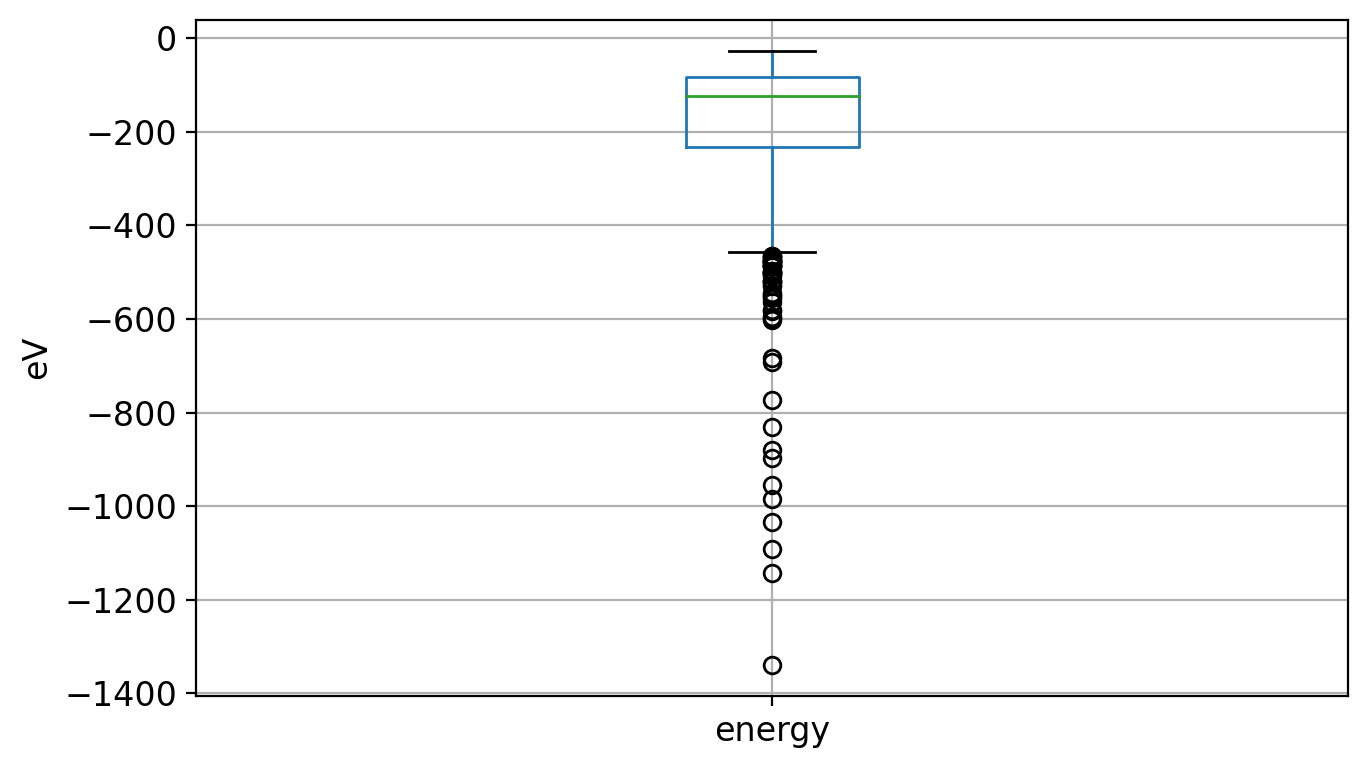

In [26]:
# วาด Box Plot
df_ABCDE1.boxplot(column='energy')
#plt.title('Box Plot of column_name')
plt.ylabel('eV')
plt.show()

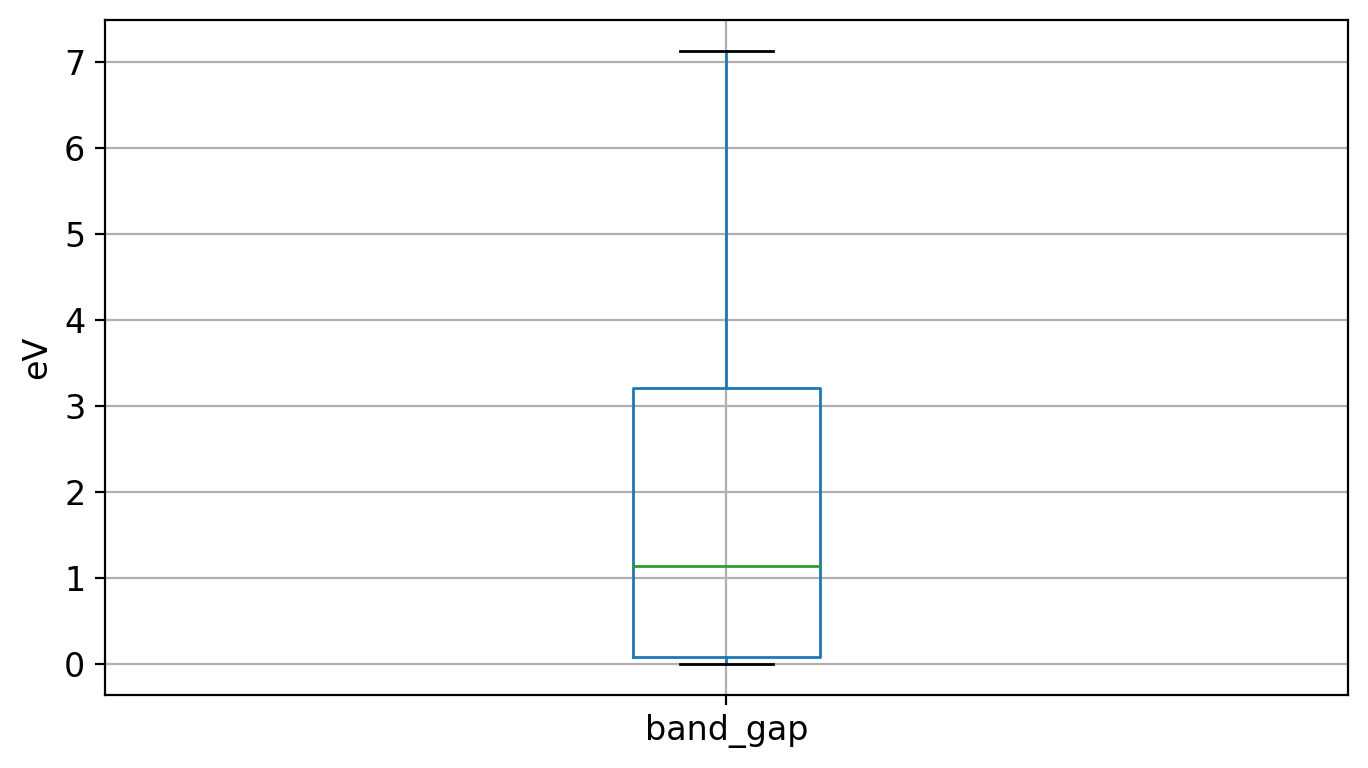

In [27]:
# วาด Box Plot
df_ABCDE1.boxplot(column='band_gap')
#plt.title('Box Plot of column_name')
plt.ylabel('eV')
plt.show()

In [30]:
df_ABCDE1["ASubWAR_square"] = None
df_ABCDE1["BSubWAR_square"] = None
df_ABCDE1["CSubWAR_square"] = None
df_ABCDE1["DSubWAR_square"] = None
df_ABCDE1["ESubWAR_square"] = None

df_ABCDE1["ASubWAR_square"] = (df_ABCDE1["A_AtomicRadius"]-df_ABCDE1["Weighted_AtomicRadius"])**2
df_ABCDE1["BSubWAR_square"] = (df_ABCDE1["B_AtomicRadius"]-df_ABCDE1["Weighted_AtomicRadius"])**2
df_ABCDE1["CSubWAR_square"] = (df_ABCDE1["C_AtomicRadius"]-df_ABCDE1["Weighted_AtomicRadius"])**2
df_ABCDE1["DSubWAR_square"] = (df_ABCDE1["D_AtomicRadius"]-df_ABCDE1["Weighted_AtomicRadius"])**2
df_ABCDE1["ESubWAR_square"] = (df_ABCDE1["E_AtomicRadius"]-df_ABCDE1["Weighted_AtomicRadius"])**2


df_ABCDE1["ASubWBP_square"] = None
df_ABCDE1["BSubWBP_square"] = None
df_ABCDE1["CSubWBP_square"] = None
df_ABCDE1["DSubWBP_square"] = None
df_ABCDE1["ESubWBP_square"] = None


df_ABCDE1["ASubWBP_square"] = (df_ABCDE1["A_BoilingPoint"]-df_ABCDE1["Weighted_BoilingPoint"])**2
df_ABCDE1["BSubWBP_square"] = (df_ABCDE1["B_BoilingPoint"]-df_ABCDE1["Weighted_BoilingPoint"])**2
df_ABCDE1["CSubWBP_square"] = (df_ABCDE1["C_BoilingPoint"]-df_ABCDE1["Weighted_BoilingPoint"])**2
df_ABCDE1["DSubWBP_square"] = (df_ABCDE1["D_BoilingPoint"]-df_ABCDE1["Weighted_BoilingPoint"])**2
df_ABCDE1["ESubWBP_square"] = (df_ABCDE1["E_BoilingPoint"]-df_ABCDE1["Weighted_BoilingPoint"])**2

df_ABCDE1

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat,AddA_kB_lC_mD_nE_p,SubA_kB_lC_mD_nE_p_square,DivA_kB_l,DivA_kC_m,DivA_kD_n,DivA_kE_p,DivB_lC_m,DivB_lD_n,DivB_lE_p,DivC_mD_n,DivC_mE_p,ASubWAM_square,BSubWAM_square,CSubWAM_square,DSubWAM_square,ESubWAM_square,ASubWAN_square,BSubWAN_square,CSubWAN_square,DSubWAN_square,ESubWAN_square,ASubWAR_square,BSubWAR_square,CSubWAR_square,DSubWAR_square,ESubWAR_square,ASubWBP_square,BSubWBP_square,CSubWBP_square,DSubWBP_square,ESubWBP_square
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,20097.258519,2191.569322,716.108304,2008.671051,546.259733,3003.040000,368.640000,84.640000,331.240000,67.240000,0.481636,0.038416,0.000036,0.126736,0.018496,3.168046e+05,9.654356e+06,2.256763e+05,1.244327e+06,9.096276e+05
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-122.344809,-6.117240,-0.904225,2.9368,"[[1.099784 5.00010181 7.39441012] Sn, [3.299...",# generated using pymatgen\ndata_SnCSNF\n_symm...,4,4,4,4,4,118.710,12.011,32.065,14.007,18.998,50,6,16,7,9,1.7,0.91,1.10,0.75,0.57,2875.0,4300.0,717.80,77.36,85.03,7.290,2.27,2.07000,0.00125,0.00170,1.96,2.55,2.58,3.04,3.98,50,6,16,7,9,7.3439,11.2603,10.3600,14.5341,17.4228,14,14,16,15,17,119,12,32,14,19,505.21,3948.15,388.510,63.29,53.63,False,False,False,False,False,69,6,16,7,10,5,2,3,2,2,solid,solid,solid,gas,gas,50,6,16,7,9,5,2,3,2,2,0.228,0.709,0.710,1.040,0.824,Sn,C,S,N,F,Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,4,4,6,5,7,39.158200,17.600000,1.006000,1611.038000,2.326590,2.822000,12.184220,39.200000,991.758000,0.702200,20,144,1.0,1.000000,1.00,

In [32]:
df_ABCDE1["ASubWD_square"] = None
df_ABCDE1["BSubWD_square"] = None
df_ABCDE1["CSubWD_square"] = None
df_ABCDE1["DSubWD_square"] = None
df_ABCDE1["ESubWD_square"] = None
df_ABCDE1["ASubWD_square"] = (df_ABCDE1["A_Density"]-df_ABCDE1["Weighted_Density"])**2
df_ABCDE1["BSubWD_square"] = (df_ABCDE1["B_Density"]-df_ABCDE1["Weighted_Density"])**2
df_ABCDE1["CSubWD_square"] = (df_ABCDE1["C_Density"]-df_ABCDE1["Weighted_Density"])**2
df_ABCDE1["DSubWD_square"] = (df_ABCDE1["D_Density"]-df_ABCDE1["Weighted_Density"])**2
df_ABCDE1["ESubWD_square"] = (df_ABCDE1["E_Density"]-df_ABCDE1["Weighted_Density"])**2


df_ABCDE1["ASubWE_square"] = None
df_ABCDE1["BSubWE_square"] = None
df_ABCDE1["CSubWE_square"] = None
df_ABCDE1["DSubWE_square"] = None
df_ABCDE1["ESubWE_square"] = None
df_ABCDE1["ASubWE_square"] = (df_ABCDE1["A_Electronegativity"]-df_ABCDE1["Weighted_Electronegativity"])**2
df_ABCDE1["BSubWE_square"] = (df_ABCDE1["B_Electronegativity"]-df_ABCDE1["Weighted_Electronegativity"])**2
df_ABCDE1["CSubWE_square"] = (df_ABCDE1["C_Electronegativity"]-df_ABCDE1["Weighted_Electronegativity"])**2
df_ABCDE1["DSubWE_square"] = (df_ABCDE1["D_Electronegativity"]-df_ABCDE1["Weighted_Electronegativity"])**2
df_ABCDE1["ESubWE_square"] = (df_ABCDE1["E_Electronegativity"]-df_ABCDE1["Weighted_Electronegativity"])**2


df_ABCDE1["ASubWFI_square"] = None
df_ABCDE1["BSubWFI_square"] = None
df_ABCDE1["CSubWFI_square"] = None
df_ABCDE1["DSubWFI_square"] = None
df_ABCDE1["ESubWFI_square"] = None
df_ABCDE1["ASubWFI_square"] = (df_ABCDE1["A_FirstIonization"]-df_ABCDE1["Weighted_FirstIonization"])**2
df_ABCDE1["BSubWFI_square"] = (df_ABCDE1["B_FirstIonization"]-df_ABCDE1["Weighted_FirstIonization"])**2
df_ABCDE1["CSubWFI_square"] = (df_ABCDE1["C_FirstIonization"]-df_ABCDE1["Weighted_FirstIonization"])**2
df_ABCDE1["DSubWFI_square"] = (df_ABCDE1["D_FirstIonization"]-df_ABCDE1["Weighted_FirstIonization"])**2
df_ABCDE1["ESubWFI_square"] = (df_ABCDE1["E_FirstIonization"]-df_ABCDE1["Weighted_FirstIonization"])**2


df_ABCDE1["ASubWMN_square"] = None
df_ABCDE1["BSubWMN_square"] = None
df_ABCDE1["CSubWMN_square"] = None
df_ABCDE1["DSubWMN_square"] = None
df_ABCDE1["ESubWMN_square"] = None
df_ABCDE1["ASubWMN_square"] = (df_ABCDE1["A_MassNumber"]-df_ABCDE1["Weighted_MassNumber"])**2
df_ABCDE1["BSubWMN_square"] = (df_ABCDE1["B_MassNumber"]-df_ABCDE1["Weighted_MassNumber"])**2
df_ABCDE1["CSubWMN_square"] = (df_ABCDE1["C_MassNumber"]-df_ABCDE1["Weighted_MassNumber"])**2
df_ABCDE1["DSubWMN_square"] = (df_ABCDE1["D_MassNumber"]-df_ABCDE1["Weighted_MassNumber"])**2
df_ABCDE1["ESubWMN_square"] = (df_ABCDE1["E_MassNumber"]-df_ABCDE1["Weighted_MassNumber"])**2


df_ABCDE1["ASubWMP_square"] = None
df_ABCDE1["BSubWMP_square"] = None
df_ABCDE1["CSubWMP_square"] = None
df_ABCDE1["ESubWMP_square"] = None
df_ABCDE1["ESubWMP_square"] = None
df_ABCDE1["ASubWMP_square"] = (df_ABCDE1["A_MeltingPoint"]-df_ABCDE1["Weighted_MeltingPoint"])**2
df_ABCDE1["BSubWMP_square"] = (df_ABCDE1["B_MeltingPoint"]-df_ABCDE1["Weighted_MeltingPoint"])**2
df_ABCDE1["CSubWMP_square"] = (df_ABCDE1["C_MeltingPoint"]-df_ABCDE1["Weighted_MeltingPoint"])**2
df_ABCDE1["DSubWMP_square"] = (df_ABCDE1["D_MeltingPoint"]-df_ABCDE1["Weighted_MeltingPoint"])**2
df_ABCDE1["ESubWMP_square"] = (df_ABCDE1["E_MeltingPoint"]-df_ABCDE1["Weighted_MeltingPoint"])**2


df_ABCDE1["ASubWSH_square"] = None
df_ABCDE1["BSubWSH_square"] = None
df_ABCDE1["CSubWSH_square"] = None
df_ABCDE1["DSubWSH_square"] = None
df_ABCDE1["ESubWSH_square"] = None
df_ABCDE1["ASubWSH_square"] = (df_ABCDE1["A_SpecificHeat"]-df_ABCDE1["Weighted_SpecificHeat"])**2
df_ABCDE1["BSubWSH_square"] = (df_ABCDE1["B_SpecificHeat"]-df_ABCDE1["Weighted_SpecificHeat"])**2
df_ABCDE1["CSubWSH_square"] = (df_ABCDE1["C_SpecificHeat"]-df_ABCDE1["Weighted_SpecificHeat"])**2
df_ABCDE1["DSubWSH_square"] = (df_ABCDE1["D_SpecificHeat"]-df_ABCDE1["Weighted_SpecificHeat"])**2
df_ABCDE1["ESubWSH_square"] = (df_ABCDE1["E_SpecificHeat"]-df_ABCDE1["Weighted_SpecificHeat"])**2


df_ABCDE1

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat,AddA_kB_lC_mD_nE_p,SubA_kB_lC_mD_nE_p_square,DivA_kB_l,DivA_kC_m,DivA_kD_n,DivA_kE_p,DivB_lC_m,DivB_lD_n,DivB_lE_p,DivC_mD_n,DivC_mE_p,ASubWAM_square,BSubWAM_square,CSubWAM_square,DSubWAM_square,ESubWAM_square,ASubWAN_square,BSubWAN_square,CSubWAN_square,DSubWAN_square,ESubWAN_square,ASubWAR_square,BSubWAR_square,CSubWAR_square,DSubWAR_square,ESubWAR_square,ASubWBP_square,BSubWBP_square,CSubWBP_square,DSubWBP_square,ESubWBP_square,ASubWD_square,BSubWD_square,CSubWD_square,DSubWD_square,ESubWD_square,ASubWE_square,BSubWE_square,CSubWE_square,DSubWE_square,ESubWE_square,ASubWFI_square,BSubWFI_square,CSubWFI_square,DSubWFI_square,ESubWFI_square,ASubWMN_square,BSubWMN_square,CSubWMN_square,DSubWMN_square,ESubWMN_square,ASubWMP_square,BSubWMP_square,CSubWMP_square,ESubWMP_square,DSubWMP_square,ASubWSH_square,BSubWSH_square,CSubWSH_square,DSubWSH_square,ESubWSH_square
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,20097.258519,2191.569322,716.108304,2008.671051,546.259733,3003.040000,368.640000,84.640000,331.240000,67.240000,0.481636,0.038416,0.000036,0.126736,0.018496,3.168046e+05,9.654356e+06,2.256763e+05,1.244327e+06,9.096276e+05,98.626906,1.687120,2.246677,12.728069,12.714088,0.443556,0.013456,0.007396,0.139876,0.244036,2.173855,0.424583,2.408394,6.875933,1.114502,20220.840000,2190.240000,718.240000,2007.040000,566.440000,5.283952e+05,8.921046e+06,3.281319e+05,6.225652e+05,8.064902e+05,0.226195,0.008724,0.008911,0.180115,0.018660
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-

In [33]:
#df_ABCDE1.to_csv("df_AkBlCmDnEp_Basic.csv")

## Embedding XRD Pattern

In [34]:
df_ABCDE1

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat,AddA_kB_lC_mD_nE_p,SubA_kB_lC_mD_nE_p_square,DivA_kB_l,DivA_kC_m,DivA_kD_n,DivA_kE_p,DivB_lC_m,DivB_lD_n,DivB_lE_p,DivC_mD_n,DivC_mE_p,ASubWAM_square,BSubWAM_square,CSubWAM_square,DSubWAM_square,ESubWAM_square,ASubWAN_square,BSubWAN_square,CSubWAN_square,DSubWAN_square,ESubWAN_square,ASubWAR_square,BSubWAR_square,CSubWAR_square,DSubWAR_square,ESubWAR_square,ASubWBP_square,BSubWBP_square,CSubWBP_square,DSubWBP_square,ESubWBP_square,ASubWD_square,BSubWD_square,CSubWD_square,DSubWD_square,ESubWD_square,ASubWE_square,BSubWE_square,CSubWE_square,DSubWE_square,ESubWE_square,ASubWFI_square,BSubWFI_square,CSubWFI_square,DSubWFI_square,ESubWFI_square,ASubWMN_square,BSubWMN_square,CSubWMN_square,DSubWMN_square,ESubWMN_square,ASubWMP_square,BSubWMP_square,CSubWMP_square,ESubWMP_square,DSubWMP_square,ASubWSH_square,BSubWSH_square,CSubWSH_square,DSubWSH_square,ESubWSH_square
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,20097.258519,2191.569322,716.108304,2008.671051,546.259733,3003.040000,368.640000,84.640000,331.240000,67.240000,0.481636,0.038416,0.000036,0.126736,0.018496,3.168046e+05,9.654356e+06,2.256763e+05,1.244327e+06,9.096276e+05,98.626906,1.687120,2.246677,12.728069,12.714088,0.443556,0.013456,0.007396,0.139876,0.244036,2.173855,0.424583,2.408394,6.875933,1.114502,20220.840000,2190.240000,718.240000,2007.040000,566.440000,5.283952e+05,8.921046e+06,3.281319e+05,6.225652e+05,8.064902e+05,0.226195,0.008724,0.008911,0.180115,0.018660
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-

In [35]:
df_XRD_0 = df_ABCDE1.copy()
df_XRD_0

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat,AddA_kB_lC_mD_nE_p,SubA_kB_lC_mD_nE_p_square,DivA_kB_l,DivA_kC_m,DivA_kD_n,DivA_kE_p,DivB_lC_m,DivB_lD_n,DivB_lE_p,DivC_mD_n,DivC_mE_p,ASubWAM_square,BSubWAM_square,CSubWAM_square,DSubWAM_square,ESubWAM_square,ASubWAN_square,BSubWAN_square,CSubWAN_square,DSubWAN_square,ESubWAN_square,ASubWAR_square,BSubWAR_square,CSubWAR_square,DSubWAR_square,ESubWAR_square,ASubWBP_square,BSubWBP_square,CSubWBP_square,DSubWBP_square,ESubWBP_square,ASubWD_square,BSubWD_square,CSubWD_square,DSubWD_square,ESubWD_square,ASubWE_square,BSubWE_square,CSubWE_square,DSubWE_square,ESubWE_square,ASubWFI_square,BSubWFI_square,CSubWFI_square,DSubWFI_square,ESubWFI_square,ASubWMN_square,BSubWMN_square,CSubWMN_square,DSubWMN_square,ESubWMN_square,ASubWMP_square,BSubWMP_square,CSubWMP_square,ESubWMP_square,DSubWMP_square,ASubWSH_square,BSubWSH_square,CSubWSH_square,DSubWSH_square,ESubWSH_square
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,20097.258519,2191.569322,716.108304,2008.671051,546.259733,3003.040000,368.640000,84.640000,331.240000,67.240000,0.481636,0.038416,0.000036,0.126736,0.018496,3.168046e+05,9.654356e+06,2.256763e+05,1.244327e+06,9.096276e+05,98.626906,1.687120,2.246677,12.728069,12.714088,0.443556,0.013456,0.007396,0.139876,0.244036,2.173855,0.424583,2.408394,6.875933,1.114502,20220.840000,2190.240000,718.240000,2007.040000,566.440000,5.283952e+05,8.921046e+06,3.281319e+05,6.225652e+05,8.064902e+05,0.226195,0.008724,0.008911,0.180115,0.018660
1,mp-556146,"{'Sn': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'F':...",Sn4C4S4N4F4,SnCSNF,-

In [45]:
def xrd(df_cif, bin_width = 0.5, wavelength = "CuKa"):
    
    structure = CifParser.from_string(df_cif).get_structures()[0]
    sga = SpacegroupAnalyzer(structure)
    conventional_structure = sga.get_conventional_standard_structure()

    
    calculator = XRDCalculator(wavelength)
    pattern = calculator.get_pattern(conventional_structure)
    
    theta = pattern.x
    intensity = pattern.y
        # กำหนดช่วงความกว้างของ theta ใหม่
        # bin_width = 5

        # สร้างขอบเขตของช่วงใหม่
    bins = np.arange(0, 90 + bin_width, bin_width)

        # จัดเรียงข้อมูลตาม theta
    theta_sorted, intensity_sorted = zip(*sorted(zip(theta, intensity)))

        # สร้าง list เก็บข้อมูล intensity ใหม่
    intensity_new = []
        #intensity_new_min = []
        #intensity_new_max = []
    intensity_new_mean = []
        #intensity_new_std = []

        # วนลูปผ่านขอบเขตของช่วงใหม่
    for i, bin_edge in enumerate(bins[:-1]):
            # หาข้อมูล intensity ที่อยู่ในช่วง
        intensity_in_bin = [intensity_sorted[j] for j in range(len(theta_sorted)) if bin_edge <= theta_sorted[j] < bins[i + 1]]
    
            # เพิ่มข้อมูล intensity ลงใน list
        if intensity_in_bin:
            intensity_new.append(intensity_in_bin)
                #intensity_new_min.append(np.min(intensity_in_bin))
                #intensity_new_max.append(np.max(intensity_in_bin))
            intensity_new_mean.append(np.mean(intensity_in_bin))
                #intensity_new_std.append(np.std(intensity_in_bin))
        else:
            intensity_new.append([0])
                #intensity_new_min.append(0)
                #intensity_new_max.append(0)
            intensity_new_mean.append(0)
                #intensity_new_std.append(0)
        # สร้าง list เก็บชื่อช่วง theta ใหม่
    theta_new = [f"{b}-{b + bin_width}" for b in bins[:-1]]

        # ตรวจสอบจำนวนข้อมูลใน intensity_new และ theta_new
    if len(intensity_new) != len(theta_new):
        raise ValueError("Number of elements in intensity_new and theta_new must be equal")
    
    angle = list(range(1, 91))
    
    return intensity_new_mean


In [46]:
#angle
print(xrd(df_XRD_0["cif"][0], wavelength = "CuKa"))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100.0, 0, 0, 0, 0, 0, 0, 0, 0, 2.328845889614075, 0, 18.559978803543842, 0, 34.89580580561976, 0, 49.982558347219396, 0, 0, 0, 0, 36.551397729305826, 0, 0, 93.43603469608482, 0.5059525976125476, 0, 0, 0, 17.013768171343088, 0, 0, 2.1390499245584302, 59.603512708848875, 0, 0, 0, 0, 4.0800979320313955, 21.79404309273948, 7.577055975827074, 0, 0, 27.734669473431016, 32.01358320159742, 3.9661233104040656, 0.0765574123432626, 9.323589012411365, 0, 13.021395500919612, 16.143805736277635, 0, 2.9742362857108753, 0, 0, 2.574180866294537, 0, 12.063130322945952, 0, 20.484938135295415, 0, 2.5923034664221216, 2.433666663085355, 5.020578380431367, 3.112526806452369, 0, 6.4083834810442015, 5.890193384627773, 10.904946457961906, 12.005812420600627, 0, 0, 19.84552717128082, 0.1646421027518172, 5.761445561274294, 2.819044867591575, 6.697342626972243, 4.0957328301275515, 1.504711397667161, 2.782799132551957, 7.554431733019909, 1.246683

In [49]:
def feature_xrd(df):
    
    feature_list = []
    #for i in range(100):
    for i in range(df.shape[0]):
    
    #for i in range(10):    
        #structure = CifParser.from_string(df["cif"][i]).get_structures()[0] 
        
        ## xrd diffraction pattern        
        feature = xrd(df["cif"][i])        
        ##  
        feature_list.append(feature)
        feature_dataframe = pd.DataFrame(feature_list)
    
    
    return feature_dataframe

In [50]:
%%time
df_XRD_feature = feature_xrd(df_XRD_0)
df_XRD_feature

CPU times: user 1min 52s, sys: 2.95 s, total: 1min 55s
Wall time: 1min 55s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,2.328846,0.000000,18.559979,0.00000,34.895806,0.000000,49.982558,0.000000,0.000000,0.000000,0.000000,36.551398,0.000000,0.000000,93.436035,0.505953,0.000000,0.000000,0.000000,17.013768,0.000000,0.000000,2.139050,59.603513,0.000000,0.000000,0.00000,0.000000,4.080098,21.794043,7.577056,0.000000,0.000000,27.734669,32.013583,3.966123,0.076557,9.323589,0.000000,13.021396,16.143806,0.000000,2.974236,0.000000,0.000000,2.574181,0.000000,12.063130,0.000000,20.484938,0.000000,2.592303,2.433667,5.020578,3.112527,0.000000,6.408383,5.890193,10.904946,12.005812,0.000000,0.000000,19.845527,0.164642,5.761446,2.819045,6.697343,4.095733,1.504711,2.782799,7.554432,1.246683,11.172133,0.000000,5.699887,2.549755,0.942946,5.018734,2.694611,3.972687,0.161177,3.062506,4.692265,0.536531,3.017485,0.000000,0.739661,0.952507,3.469994,2.227081,2.568157,0.000000,2.519546,5.660124,0.000000,1.426422,1.736713,5.524050,4.231266,3.809255,2.489887,3.027108,3.804096,2.735184,0.643949,0.694875,0.755125,2.375463,0.031515,2.671297,0.000000,1.080060,1.036632,2.254744,0.757084,0.885574,1.842109,0.542446,1.133214,0.059700,0.433409,2.569591,0.677306,0.121164,3.398001,1.284273,4.745235,1.132186,0.140412,3.714374,1.029313,3.457206,1.588335,2.862414,2.473789,0.766910,0.282243,1.143307,0.182895,0.610049,0.000000,0.081462,1.124843,1.100625,0.552281,1.213087,1.036500,1.965647
1,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,82.309936,0.00000,31.858098,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.760500,0.000000,0.000000,0.132521,0.000000,17.408850,44.371210,0.000000,0.000000,0.000000,0.000000,1.862436,94.537495,0.000000,0.000000,9.638823,0.00000,46.240878,0.000000,26.386382,46.399893,0.399118,0.000000,0.000000,0.000000,0.070545,0.000000,0.000000,15.241967,0.000000,0.000000,0.859302,7.134800,8.306572,0.000000,0.000000,0.000000,0.000000,0.000000,1.949273,32.307845,0.000000,23.972077,31.463789,17.345084,5.223595,0.000000,0.000000,7.339217,0.000000,5.685444,0.000000,1.231072,0.000000,2.224261,1.653045,0.000000,0.732675,7.545686,7.671645,0.872132,2.256168,3.598703,19.077825,3.377165,0.000000,16.154709,0.000000,12.949445,8.805929,9.136942,4.886655,6.322457,0.000000,0.000000,0.000000,0.663314,1.372548,0.030001,3.237310,3.014317,0.000000,0.000000,0.542893,1.483869,5.383154,0.733641,10.392965,3.614896,2.750115,0.719357,7.160434,4.360265,2.880918,2.123697,0.374117,1.671650,0.000000,0.034860,0.521666,2.343768,1.442247,0.455187,2.089322,1.041946,0.000000,3.210486,1.507336,2.416854,5.151576,4.211691,2.647456,0.000000,0.291365,1.111795,0.221435,0.017019,0.308104,3.245911,0.000000,1.112635,2.380585,0.435450,1.201349,2.643790,0.528730,0.000000,5.124734,4.812382,2.578871,2.355478,0.597240,0.804995,2.361210,0.000000,1.715364,1.082845,3.065970
2,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,41.321868,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,39.645493,0.00000,19.325788,0.000000,0.000000,16.273575,60.309872,0.000000,0.000000,0.000000,12.713311,0.000000,0

In [51]:
#df_XRD_feature.to_csv("df_ABCDE_XRD.csv")

In [52]:
data_XRD = df_XRD_feature.copy()

## Encoding XRD

Epoch [1/500], Train Loss: 103.6282, Val Loss: 103.1103
Epoch [2/500], Train Loss: 103.6609, Val Loss: 103.0472
Epoch [3/500], Train Loss: 103.6061, Val Loss: 102.9708
Epoch [4/500], Train Loss: 103.5157, Val Loss: 102.8659
Epoch [5/500], Train Loss: 103.3602, Val Loss: 102.7236
Epoch [6/500], Train Loss: 103.3844, Val Loss: 102.5391
Epoch [7/500], Train Loss: 103.1595, Val Loss: 102.3185
Epoch [8/500], Train Loss: 102.8105, Val Loss: 102.0821
Epoch [9/500], Train Loss: 102.6238, Val Loss: 101.8539
Epoch [10/500], Train Loss: 102.5604, Val Loss: 101.6465
Epoch [11/500], Train Loss: 102.3518, Val Loss: 101.4760
Epoch [12/500], Train Loss: 101.8955, Val Loss: 101.3449
Epoch [13/500], Train Loss: 102.0206, Val Loss: 101.2523
Epoch [14/500], Train Loss: 101.9542, Val Loss: 101.1854
Epoch [15/500], Train Loss: 102.0502, Val Loss: 101.1380
Epoch [16/500], Train Loss: 102.1212, Val Loss: 101.1022
Epoch [17/500], Train Loss: 101.8653, Val Loss: 101.0772
Epoch [18/500], Train Loss: 101.5975, Va

Epoch [153/500], Train Loss: 101.4131, Val Loss: 100.9342
Epoch [154/500], Train Loss: 101.7200, Val Loss: 100.9341
Epoch [155/500], Train Loss: 101.5103, Val Loss: 100.9338
Epoch [156/500], Train Loss: 101.7289, Val Loss: 100.9333
Epoch [157/500], Train Loss: 101.3845, Val Loss: 100.9329
Epoch [158/500], Train Loss: 101.6713, Val Loss: 100.9326
Epoch [159/500], Train Loss: 101.6639, Val Loss: 100.9325
Epoch [160/500], Train Loss: 101.6659, Val Loss: 100.9324
Epoch [161/500], Train Loss: 101.8159, Val Loss: 100.9320
Epoch [162/500], Train Loss: 101.6594, Val Loss: 100.9323
Epoch [163/500], Train Loss: 101.6381, Val Loss: 100.9320
Epoch [164/500], Train Loss: 101.4946, Val Loss: 100.9314
Epoch [165/500], Train Loss: 101.6025, Val Loss: 100.9310
Epoch [166/500], Train Loss: 101.6293, Val Loss: 100.9313
Epoch [167/500], Train Loss: 101.6626, Val Loss: 100.9309
Epoch [168/500], Train Loss: 101.4595, Val Loss: 100.9304
Epoch [169/500], Train Loss: 101.5379, Val Loss: 100.9300
Epoch [170/500

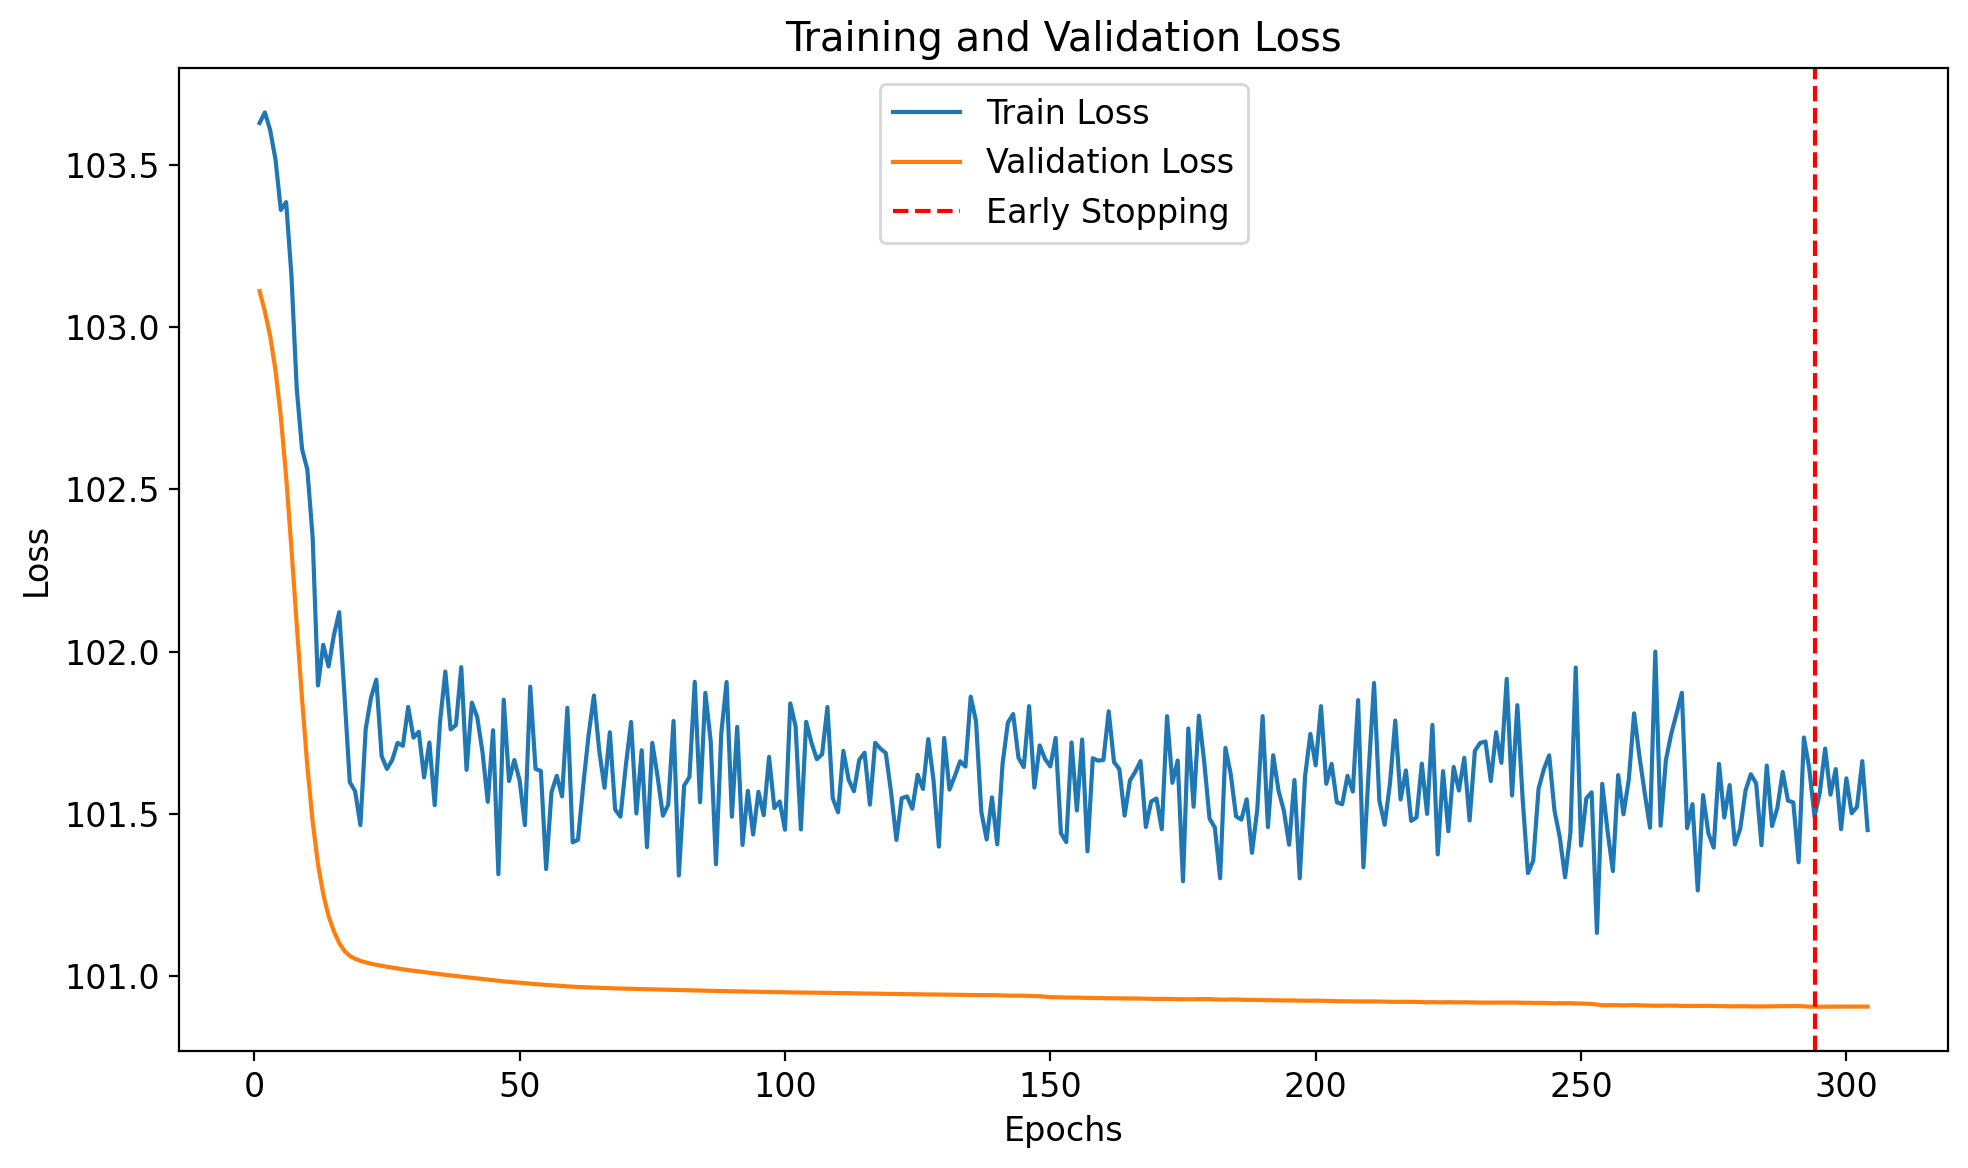

In [54]:
# Define Autoencoder model with Dropout
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 60),
            nn.ReLU(),
            nn.Dropout(0.2),  # Dropout layer with 20% rate
            nn.Linear(60, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 60),
            nn.ReLU(),
            nn.Dropout(0.2),  # Dropout layer with 20% rate
            nn.Linear(60, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Parameters
input_dim = 180  # Number of XRD features
encoding_dim = 30  # Desired reduced dimension
batch_size = 64
epochs = 500
learning_rate = 0.0001
patience = 10  # Early stopping patience

# Prepare data
xrd_features = torch.tensor(data_XRD.values, dtype=torch.float32)
train_data, val_data = train_test_split(xrd_features, test_size=0.2, random_state=42)
train_loader = DataLoader(TensorDataset(train_data), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(val_data), batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early Stopping variables
best_loss = float('inf')
best_epoch = 0
model_path = "best_autoencoder.pth"
train_losses = []
val_losses = []

# Training with Early Stopping
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch in train_loader:
        inputs = batch[0]
        _, outputs = model(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            inputs = batch[0]
            _, outputs = model(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Check for Early Stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), model_path)  # Save the best model
    elif epoch - best_epoch >= patience:
        print("Early stopping triggered!")
        break

# Plot training and validation losses
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
#plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
#plt.axvline(best_epoch + 1, color='r', linestyle='--', label='Early Stopping')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.title('Training and Validation Loss')
#plt.legend()
#plt.show()


In [56]:
# Load the best model
model.load_state_dict(torch.load(model_path))

# Extract encoded features
with torch.no_grad():
    encoded_features, _ = model(xrd_features)

# Convert encoded features to DataFrame
encoded_features_df = pd.DataFrame(encoded_features.numpy(), columns=[f"Encoded_{i+1}" for i in range(encoding_dim)])
encoded_features_df

,Encoded_1,Encoded_2,Encoded_3,Encoded_4,Encoded_5,Encoded_6,Encoded_7,Encoded_8,Encoded_9,Encoded_10,Encoded_11,Encoded_12,Encoded_13,Encoded_14,Encoded_15,Encoded_16,Encoded_17,Encoded_18,Encoded_19,Encoded_20,Encoded_21,Encoded_22,Encoded_23,Encoded_24,Encoded_25,Encoded_26,Encoded_27,Encoded_28,Encoded_29,Encoded_30
0,0.000000,0.0,5.575090,0.0,0.0,20.903234,20.883892,0.0,0.000000,29.057568,2.097818,20.709497,40.347973,8.362556,23.658430,16.663408,5.874405,8.865588,10.771879,4.161862,18.376354,21.693983,32.267700,11.583175,14.014143,0.718648,38.985371,21.352737,0.000000,0.000000
1,0.000000,0.0,7.634462,0.0,0.0,19.044500,23.545042,0.0,0.469406,23.687229,0.614404,28.554703,34.557140,3.015115,14.918111,19.867649,14.689562,8.629033,11.506408,0.000000,15.182978,21.227406,20.389277,2.428409,11.369480,2.982867,49.183777,20.099619,2.414268,0.000000
2,2.456690,0.0,7.800205,0.0,0.0,16.202902,25.262783,0.0,3.278134,26.833609,4.055021,25.937382,30.319330,1.848202,20.613838,15.826152,18.394623,10.379952,16.113811,1.809046,21.142132,14.780752,19.246750,0.000000,8.887315,1.585126,46.768147,22.268223,5.253917,0.000000
3,0.000000,0.0,5.296250,0.0,0.0,18.282602,24.531691,0.0,0.000000,31.896599,1.586081,26.660561,36.411842,11.343904,24.449492,23.136026,20.735525,2.636340,21.792446,0.000000,33.716976,21.163992,26.693970,0.685309,18.684719,6.880918,52.495251,32.594692,1.321954,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,4.969095,0.336666,0.0,0.000000,0.350626,6.140178,0.000000,0.000000,0.000000,0.150459,4.293818,0.000000,9.400035,5.571345,5.041411,0.000000,0.000000,0.000000,6.563118,5.555643,5.994860,0.000000,1.492396,0.000000,0.602594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,0.000000,0.0,4.338183,0.0,0.0,17.099943,13.180539,0.0,0.000000,13.451118,3.046398,19.607304,23.774464,4.052786,8.361244,13.559962,4.514320,2.865191,16.365738,2.511652,14.150625,13.694870,16.511499,7.363757,8.906222,3.603445,29.498161,14.156199,1.472988,0.000000
1251,0.000000,0.0,2.167382,0.0,0.0,13.293591,8.993526,0.0,0.000000,12.377673,0.899786,18.573896,19.607904,3.029993,10.802691,12.948826,4.243408,8.494689,12.905293,0.745366,10.278784,15.351026,15.909238,5.170692,10.903991,4.613297,22.152016,16.362368,0.000000,1.185732
1252,2.217355,0.0,4.122818,0.0,0.0,8.720953,9.810109,0.0,0.000000,8.638313,0.000000,14.803582,16.022015,0.000000,7.981918,7.042268,5.032359,0.000000,10.176131,1.894421,7.524955,10.161291,8.170107,0.492469,4.735861,0.000000,19.139894,10.053395,1.930055,0.000000
1253,0.000000,0.0,4.626224,0.0,0.0,8.209455,7.616551,0.0,1.862254,8.237876,0.539587,10.710143,9.415096,0.278515,3.637884,8.830905,1.655727,6.358092,4.903069,0.636875,7.973564,8.742932,5.346628,3.456492,1.753086,3.303862,14.661854,7.343437,3.285968,1.176456


In [57]:
df_ABCDE_XRD = pd.concat([df_XRD_0, encoded_features_df],axis = 1)
df_ABCDE_XRD

,material_id,formula,full_formula,pretty_formula,energy,energy_per_atom,formation_energy_per_atom,band_gap,structure,cif,A_k,B_l,C_m,D_n,E_p,A_AtomicMass,B_AtomicMass,C_AtomicMass,D_AtomicMass,E_AtomicMass,A_AtomicNumber,B_AtomicNumber,C_AtomicNumber,D_AtomicNumber,E_AtomicNumber,A_AtomicRadius,B_AtomicRadius,C_AtomicRadius,D_AtomicRadius,E_AtomicRadius,A_BoilingPoint,B_BoilingPoint,C_BoilingPoint,D_BoilingPoint,E_BoilingPoint,A_Density,B_Density,C_Density,D_Density,E_Density,A_Electronegativity,B_Electronegativity,C_Electronegativity,D_Electronegativity,E_Electronegativity,A_Electrons,B_Electrons,C_Electrons,D_Electrons,E_Electrons,A_FirstIonization,B_FirstIonization,C_FirstIonization,D_FirstIonization,E_FirstIonization,A_Group,B_Group,C_Group,D_Group,E_Group,A_MassNumber,B_MassNumber,C_MassNumber,D_MassNumber,E_MassNumber,A_MeltingPoint,B_MeltingPoint,C_MeltingPoint,D_MeltingPoint,E_MeltingPoint,A_Metalloid,B_Metalloid,C_Metalloid,D_Metalloid,E_Metalloid,A_Neutrons,B_Neutrons,C_Neutrons,D_Neutrons,E_Neutrons,A_Period,B_Period,C_Period,D_Period,E_Period,A_Phase,B_Phase,C_Phase,D_Phase,E_Phase,A_Protons,B_Protons,C_Protons,D_Protons,E_Protons,A_Shells,B_Shells,C_Shells,D_Shells,E_Shells,A_SpecificHeat,B_SpecificHeat,C_SpecificHeat,D_SpecificHeat,E_SpecificHeat,A_Symbol,B_Symbol,C_Symbol,D_Symbol,E_Symbol,A_Type,B_Type,C_Type,D_Type,E_Type,A_Valence,B_Valence,C_Valence,D_Valence,E_Valence,Weighted_AtomicMass,Weighted_AtomicNumber,Weighted_AtomicRadius,Weighted_BoilingPoint,Weighted_Density,Weighted_Electronegativity,Weighted_FirstIonization,Weighted_MassNumber,Weighted_MeltingPoint,Weighted_SpecificHeat,AddA_kB_lC_mD_nE_p,SubA_kB_lC_mD_nE_p_square,DivA_kB_l,DivA_kC_m,DivA_kD_n,DivA_kE_p,DivB_lC_m,DivB_lD_n,DivB_lE_p,DivC_mD_n,DivC_mE_p,ASubWAM_square,BSubWAM_square,CSubWAM_square,DSubWAM_square,ESubWAM_square,ASubWAN_square,BSubWAN_square,CSubWAN_square,DSubWAN_square,ESubWAN_square,ASubWAR_square,BSubWAR_square,CSubWAR_square,DSubWAR_square,ESubWAR_square,ASubWBP_square,BSubWBP_square,CSubWBP_square,DSubWBP_square,ESubWBP_square,ASubWD_square,BSubWD_square,CSubWD_square,DSubWD_square,ESubWD_square,ASubWE_square,BSubWE_square,CSubWE_square,DSubWE_square,ESubWE_square,ASubWFI_square,BSubWFI_square,CSubWFI_square,DSubWFI_square,ESubWFI_square,ASubWMN_square,BSubWMN_square,CSubWMN_square,DSubWMN_square,ESubWMN_square,ASubWMP_square,BSubWMP_square,CSubWMP_square,ESubWMP_square,DSubWMP_square,ASubWSH_square,BSubWSH_square,CSubWSH_square,DSubWSH_square,ESubWSH_square,Encoded_1,Encoded_2,Encoded_3,Encoded_4,Encoded_5,Encoded_6,Encoded_7,Encoded_8,Encoded_9,Encoded_10,Encoded_11,Encoded_12,Encoded_13,Encoded_14,Encoded_15,Encoded_16,Encoded_17,Encoded_18,Encoded_19,Encoded_20,Encoded_21,Encoded_22,Encoded_23,Encoded_24,Encoded_25,Encoded_26,Encoded_27,Encoded_28,Encoded_29,Encoded_30
0,mp-559882,"{'Hg': 1.0, 'C': 1.0, 'S': 1.0, 'N': 1.0, 'Cl'...",Hg4C4S4N4Cl4,HgCSNCl,-94.858193,-4.742910,-0.300967,2.7469,"[[1.103121 0.95457 3.9479795] Hg, [3.309363...",# generated using pymatgen\ndata_HgCSNCl\n_sym...,4,4,4,4,4,200.590,12.011,32.065,14.007,35.453,80,6,16,7,17,1.8,0.91,1.10,0.75,0.97,630.0,4300.0,717.80,77.36,239.11,13.500,2.27,2.07000,0.00125,0.00321,2.00,2.55,2.58,3.04,3.16,80,6,16,7,17,10.4375,11.2603,10.3600,14.5341,12.9676,12,14,16,15,17,201,12,32,14,35,234.43,3948.15,388.510,63.29,172.31,False,False,False,False,False,121,6,16,7,18,6,2,3,2,3,liq,solid,solid,gas,gas,80,6,16,7,17,6,2,3,2,3,0.140,0.709,0.710,1.040,0.479,Hg,C,S,N,Cl,Transition Metal,Nonmetal,Nonmetal,Nonmetal,Halogen,0,4,6,5,7,58.825200,25.200000,1.106000,1192.854000,3.568892,2.666000,11.911900,58.800000,961.338000,0.615600,20,144,1.0,1.000000,1.00,1.00,1.000000,1.00,1.0,1.00,1.00,20097.258519,2191.569322,716.108304,2008.671051,546.259733,3003.040000,368.640000,84.640000,331.240000,67.240000,0.481636,0.038416,0.000036,0.126736,0.018496,3.168046e+05,9.654356e+06,2.256763e+05,1.244327e+06,9.096276e+05,98.626906,1.687120,2.246677,12.728069,12.714088,0.443556,0.013456,0.00

In [58]:
#df_ABCDE_XRD.to_csv("df_AkBlCmDnEp_Basic_ENG_XRD.csv")